# Pymaceuticals Inc.
---

In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

At the onset of analysis, it was important to note mouse ‘g989’ was removed from data, as validity of duplicate information could not be confirmed. 

Tumor volume was lowest on drug regimen Ramicane, and the the greatest variance among the mice on the Ketapril regimen. 

The study contained just slightly more male than female mice, further analysis would be required to compare tumor size among the gender of the mice.

The data additionally identified a positive correlation between weight and tumor volume, i.e., larger mice had larger tumors.  

One outliner was identified on the drug regimen Infubinol, and needs further review to see if the data should be removed. 

For Pymaceuticals, the Capomulin treatment showed an overall decrease in Tumor size for the first 30+ days of the study, around day 35 tumor volume began to increase, further analysis would be needed of greater duration.  

 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combo_df = pd.merge(study_results, mouse_metadata, how='left', on= ['Mouse ID', 'Mouse ID'])


# Display the data table for preview
combo_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combo_df['Mouse ID'].nunique()


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combo_df.loc[combo_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combo_df.loc[combo_df['Mouse ID']== 'g989',:]
duplicate_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combo_df = combo_df.drop(combo_df[combo_df['Mouse ID'] == 'g989'].index)


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_combo_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_vol = clean_combo_df.groupby(by="Drug Regimen")['Tumor Volume (mm3)'].mean()
median_vol = clean_combo_df.groupby(by="Drug Regimen")['Tumor Volume (mm3)'].median()
variance_vol = clean_combo_df.groupby(by="Drug Regimen")['Tumor Volume (mm3)'].var()
sd_vol = clean_combo_df.groupby(by="Drug Regimen")['Tumor Volume (mm3)'].std()
sem_vol = clean_combo_df.groupby(by="Drug Regimen")['Tumor Volume (mm3)'].sem()

summary_stats_df = pd.DataFrame({'Mean Tumor Volume':mean_vol,'Median Tumor Volume':median_vol,'Tumor Volume Variance':variance_vol,'Tumor Volume Std. Dev.':sd_vol,'Tumor Volume Std. Err.':sem_vol}) 
summary_stats_df.index.name = 'Drug Regimen'
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats_df2 = clean_combo_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot: title={'center': 'Total Timepoints'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

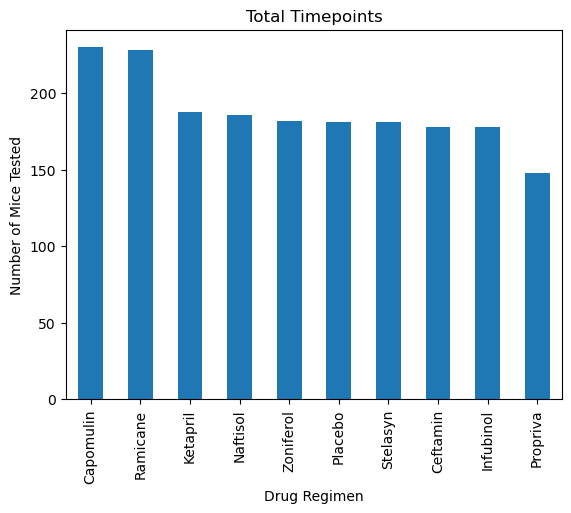

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pd_plot = clean_combo_df.groupby(['Drug Regimen']).count()['Timepoint']
pd_plot_sorted = pd_plot.sort_values(ascending=False)
pd_plot_sorted.plot(kind='bar',title='Total Timepoints', ylabel='Number of Mice Tested')


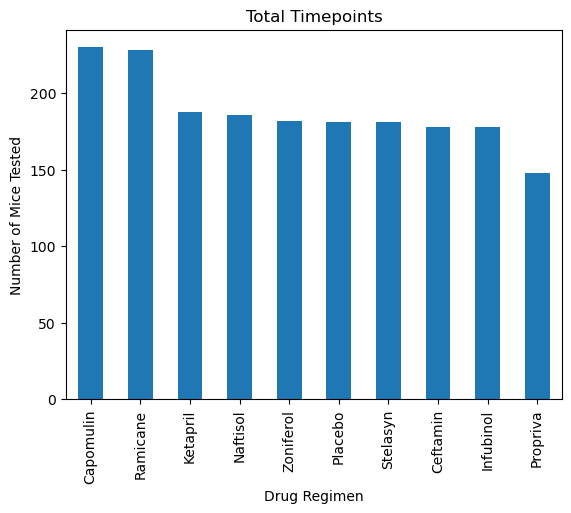

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(pd_plot_sorted.index, pd_plot_sorted.values, width=0.5)
plt.title('Total Timepoints')
plt.xlabel('Drug Regimen')
plt.xlim(-0.5, len(pd_plot_sorted.index)-0.5)
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

Male      958
Female    922
Name: Sex, dtype: int64


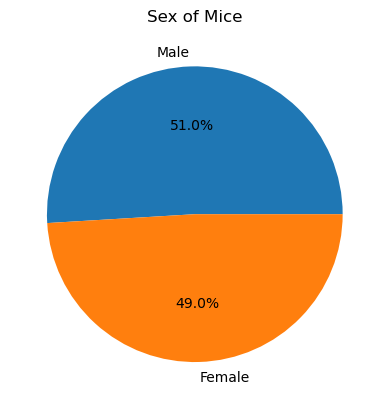

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_pie = clean_combo_df['Sex'].value_counts()
sex_pie.plot(kind='pie', title='Sex of Mice', label='',autopct="%1.1f%%")
print(sex_pie)

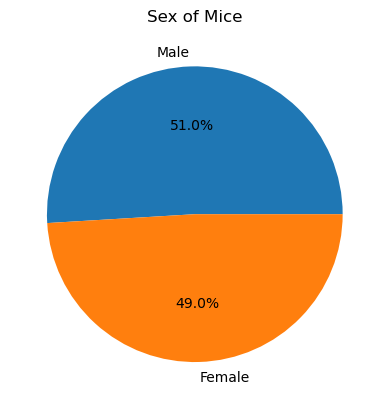

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = clean_combo_df['Sex'].value_counts()

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title('Sex of Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
group_df = clean_combo_df.groupby(['Mouse ID'])['Timepoint'].max()
# Reset Group_df index
group_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time_df = pd.merge(group_df,clean_combo_df,how='inner',on=('Mouse ID','Timepoint'))


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = max_time_df[max_time_df['Drug Regimen'] == treatment]
    treatment_df = treatment_df['Tumor Volume (mm3)']
    tumor_vol_data.append(max_time_df.loc[max_time_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].values)
    # add subset 
    quartiles = treatment_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lowerbound = lowerq-(1.5*iqr)
    upperbound = upperq +(1.5*iqr)
    outliers = [x for x in treatment_df.values if x > upperbound or x < lowerbound]
    
    # Determine outliers using upper and lower bounds
    print(treatment + ' IQR and Outliers')
    print('IQR: ' + str(iqr))
    print(treatment + ' outliers: ' + str(outliers))
    print('-----------------------------------')

Capomulin IQR and Outliers
IQR: 7.781863460000004
Capomulin outliers: []
-----------------------------------
Ramicane IQR and Outliers
IQR: 9.098536719999998
Ramicane outliers: []
-----------------------------------
Infubinol IQR and Outliers
IQR: 11.477135160000003
Infubinol outliers: [36.3213458]
-----------------------------------
Ceftamin IQR and Outliers
IQR: 15.577752179999997
Ceftamin outliers: []
-----------------------------------


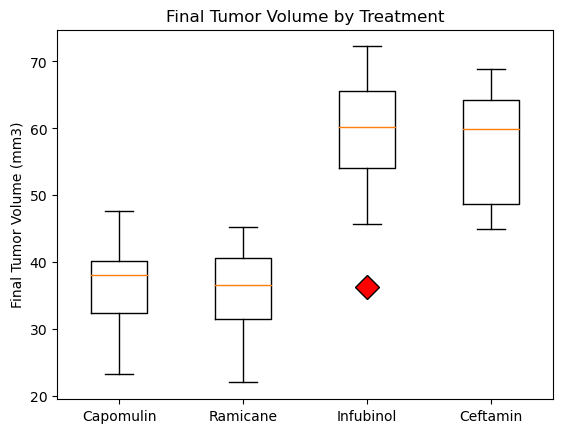

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops={'marker': 'D', 'markersize': 12, 'markerfacecolor': 'red'})
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

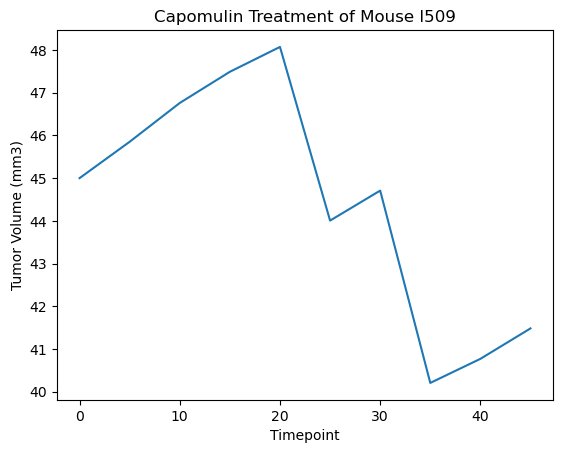

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = clean_combo_df[clean_combo_df['Mouse ID']=='l509']
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.plot(cap_df["Timepoint"],cap_df["Tumor Volume (mm3)"])

plt.show()

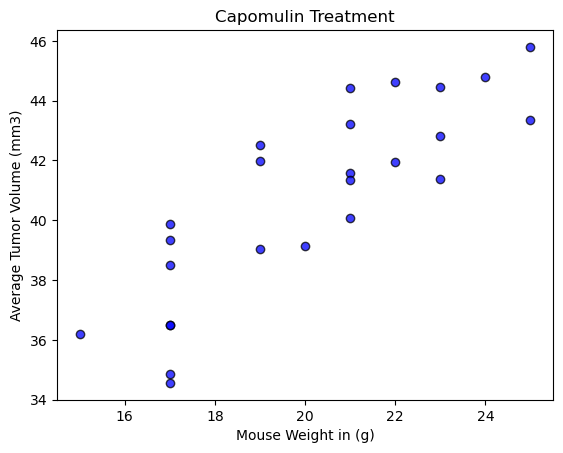

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df2 = clean_combo_df[clean_combo_df['Drug Regimen']=='Capomulin']
plt.scatter(cap_df2.groupby(['Mouse ID'])['Weight (g)'].mean(), cap_df2.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean(), marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Mouse Weight in (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


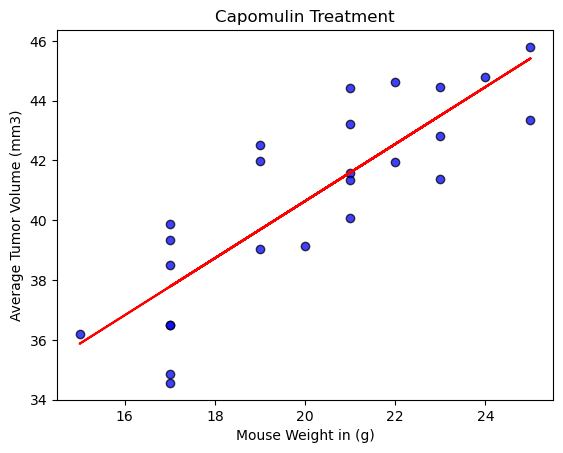

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_df3 = clean_combo_df[clean_combo_df['Drug Regimen']=='Capomulin']
weight = cap_df3.groupby(['Mouse ID'])['Weight (g)'].mean()
tum_vol = cap_df3.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
correlation = st.pearsonr(weight, tum_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tum_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(cap_df3.groupby(['Mouse ID'])['Weight (g)'].mean(), cap_df3.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean(), marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Mouse Weight in (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Treatment")

plt.show()
